In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Dataset Information

- **PassengerId**: A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- **HomePlanet**: The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep**: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin**: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **Destination**: The planet the passenger will be debarking to.
- **Age**: The age of the passenger.
- **VIP**: Whether the passenger has paid for special VIP service during the voyage.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name**: The first and last names of the passenger.
- **Transported**: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [101]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [102]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [103]:
train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [104]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [105]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [106]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


*note to my self*

separate the passenger id by group id and id  drop name

In [108]:
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [109]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [110]:
# Separate `PassengerId` into `GroupId` and `Id`
train['GroupId'] = train['PassengerId'].str.split('_').str[0]
train['Id'] = train['PassengerId'].str.split('_').str[1]


# Separate `Cabin` into `Deck`, `Num`, and `Side_Port`
train[['Deck', 'Num', 'Side_Port']] = train['Cabin'].str.split('/', expand=True)


# Drop the original Cabin
train.drop(columns=['Cabin','Name','PassengerId'], inplace=True)

train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,Id,Deck,Num,Side_Port
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S


In [111]:
train['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [112]:
train['CryoSleep'].sum()

3037

In [113]:
train['Transported'].sum()

4378

In [114]:
train['Deck'].value_counts()

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

## Visualization

### plot transported against everything use pca hyperparamater tuning and k fold cross validation

In [115]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,Id,Deck,Num,Side_Port
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S


In [116]:
def plot_against_target(data, target_column):
    # Determine the type of each column
    for column in data.columns:
        if column != target_column:
            plt.figure(figsize=(10, 6))
            
            # Check if the column is numerical or categorical
            if pd.api.types.is_numeric_dtype(data[column]):
                # Numerical column
                sns.boxplot(x=target_column, y=column, data=data)
                plt.title(f'{column} vs {target_column}')
            else:
                # Categorical column
                sns.countplot(x=column, hue=target_column, data=data)
                plt.title(f'{column} distribution by {target_column}')
                
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [117]:
#### plot_against_target(train,'Transported')

<Axes: xlabel='Age', ylabel='Count'>

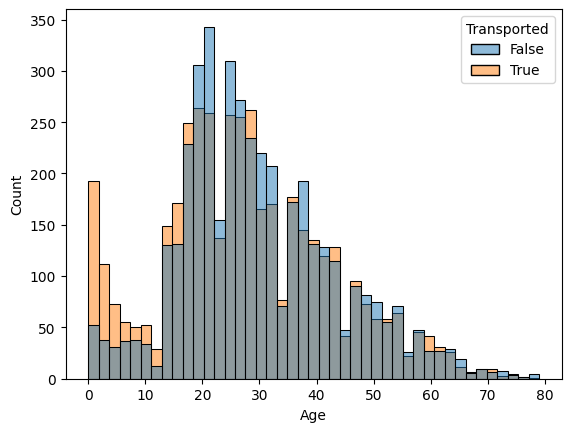

In [118]:
sns.histplot(data=train, x='Age', hue='Transported')

## Preprocessing

In [119]:
columns_to_drop = ['ShoppingMall','FoodCourt', 'RoomService', 'Spa', 'VRDeck']

train.drop(columns=columns_to_drop, inplace=True)

In [120]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
cols_to_encode = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Transported', 'Deck',"Side_Port"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to selected columns
for col in cols_to_encode:
    if col in train.columns:
        train[col] = label_encoder.fit_transform(train[col])

train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,GroupId,Id,Deck,Num,Side_Port
0,1,0,2,39.0,0,0,0001,01,1,0,0
1,0,0,2,24.0,0,1,0002,01,5,0,1
2,1,0,2,58.0,1,0,0003,01,0,0,1
3,1,0,2,33.0,0,0,0003,02,0,0,1
4,0,0,2,16.0,0,1,0004,01,5,1,1


In [121]:
train.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age            179
VIP              0
Transported      0
GroupId          0
Id               0
Deck             0
Num            199
Side_Port        0
dtype: int64

In [122]:
train['Num'] = train['Num'].fillna(0)

In [123]:
from sklearn.impute import SimpleImputer

# Assuming 'train' is your DataFrame containing data with 'Age' and 'Age_imputed'

# Create a binary indicator for missing values in 'Age'
train['Age_missing'] = train['Age'].isnull().astype(int)

# Impute missing values in 'Age' with median
imputer = SimpleImputer(strategy='median')
train['Age_imputed'] = imputer.fit_transform(train[['Age']])

In [129]:
train['Age'] = train['Age'].fillna(-1)

In [130]:
train.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
GroupId        0
Id             0
Deck           0
Num            0
Side_Port      0
Age_missing    0
Age_imputed    0
dtype: int64

## Build Model

In [131]:
X = train.drop(['Transported'], axis=1)
y = train.pop("Transported")

In [141]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Define your model parameters dictionary
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1, 5, 10, 0.5]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10, 100, 150]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'learning_rate': [0.05, 0.1, 0.2],
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random']
        }
    }
}


In [142]:
# Initialize the k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store the results
scores = []

# Iterate over each model in model_params
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=kfold, return_train_score=False, error_score='raise')
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Create a DataFrame from the scores list
best_model = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Print or return the best models and their parameters
print(best_model)

                 model  best_score  \
0  logistic_regression    0.715405   
1        random_forest    0.725065   
2    gradient_boosting    0.747268   
3        decision_tree    0.673761   

                                         best_params  
0                                           {'C': 5}  
1                              {'n_estimators': 150}  
2  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  
3        {'criterion': 'gini', 'splitter': 'random'}  


In [146]:
best_model


,model,best_score,best_params
0,logistic_regression,0.715405,{'C': 5}
1,random_forest,0.725065,{'n_estimators': 150}
2,gradient_boosting,0.747268,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
3,decision_tree,0.673761,"{'criterion': 'gini', 'splitter': 'random'}"
